# Exercise 1

For the evaluation of this unit, the student is asked to solve the following problem using the above Python Notebooks.

Create a script that generates random data from different distributions. Compare: (a) a normal or Gaussian distribution for different values of the variance and mean, (b) a uniformly random distribution, (c) the beta distribution.

In [1]:
#### Import necessary packages ####
import numpy as np
import matplotlib.pyplot as plt

## Definition of the distributions

##### Gaussian / normal distribution

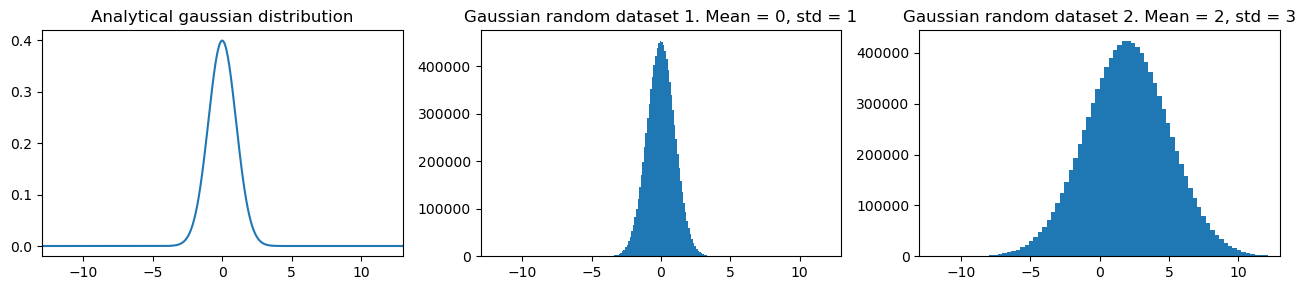

In [21]:
# Analytical definition of the distribution
meanA = 0; stdA = 1

def gauss(x, mean, std):
    return (1/np.sqrt(2*np.pi*(std**2)))*np.exp(-(x-mean)**2/(2*std**2))

x = np.linspace(-13,13,1000); y = gauss(x, meanA, stdA)

# Random generation of samples following a gaussian distribution
N_samples = int(1e7) 

mean1 = 0; std1 = 1
gauss_random1 = np.random.normal(loc=mean1, scale=std1, size=N_samples)

mean2 = 2; std2 = 3
gauss_random2 = np.random.normal(loc=mean2, scale=std2, size=N_samples)

# Plotting
fig1, axes_gauss = plt.subplots(nrows= 1, ncols= 3, figsize=(13, 3))
axes_gauss[0].plot(x,y); axes_gauss[1].hist(gauss_random1, 100); axes_gauss[2].hist(gauss_random2, 100);
axes_gauss[0].set_title('Analytical gaussian distribution'); 
axes_gauss[1].set_title(f"Gaussian random dataset 1. Mean = {mean1}, std = {std1}"); 
axes_gauss[2].set_title(f"Gaussian random dataset 2. Mean = {mean2}, std = {std2}")
xlim = [-13,13]
for ax in axes_gauss:
    ax.set_xlim(xlim)
plt.tight_layout()


##### Uniformly random distribution

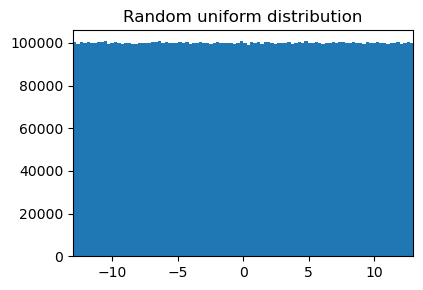

In [22]:
# Random generation of samples inside xlim interval
xlim = [-13,13];
uniform_random = (xlim[1] - xlim[0]) * (-0.5 + np.random.rand(N_samples))

# Plotting
fig2, axes_un = plt.subplots(nrows= 1, ncols= 1, figsize=(13/3, 3))
axes_un.hist(uniform_random, 100);
axes_un.set_title('Random uniform distribution'); 
axes_un.set_xlim(xlim);
plt.tight_layout()

##### Beta random distribution

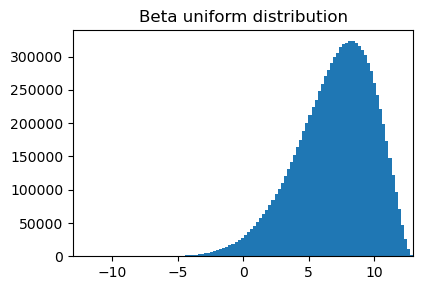

In [23]:
# Random generation of samples following beta distribution
alpha = 10; beta = 3
beta_random = (xlim[1] - xlim[0]) * (-0.5 +  np.random.beta(alpha, beta, N_samples))

# Plotting
fig3, axes_bet = plt.subplots(nrows= 1, ncols= 1, figsize=(13/3, 3))
axes_bet.hist(beta_random, 100);
axes_bet.set_title('Beta uniform distribution'); 
axes_bet.set_xlim(xlim)
plt.tight_layout()

## Problem 1
Estimate and compare the confidence intervals or error bars obtained for each distribution using Hoeffding's inequality and the Chebyshev inequality (for the latter one, you need to analyze or empirically estimate the variance).

##### Preliminary comments
For solving this problem, we will compare the confidence interval given by the Hoeffding's inequality:
$$
P(|\bar{X} - E[\bar{X}]| \ge \epsilon) \le 2e^{-\frac{2n^2\epsilon^2}{\sum_{i=1}^{n} (a_i-b_i)^2}}
$$

And the Chebyshev inequality:
$$
P(|X - E[X]| \ge \epsilon) \le \frac{Var(X)}{\epsilon^2}
$$

From these two inequalities, we can set the error probability (this is, the probability of being "outside" the $\epsilon$ range) to a specific value and compute the value of $\epsilon$ (the confidence interval) for that probability. To do this, we can solve for $\epsilon$ in both equations, and this will wive us an analytical expression for the error bar or confidence interval for a specific confidence probability.

For the Hoeffding's inequality we get:
$$
\epsilon_H = \frac{(a-b)}{n}*\sqrt{\frac{log(\frac{P(|\bar{X} - E[\bar{X}]| \ge \epsilon)}{2})}{-2}}
$$

And for Chebyshev inequality we get a simpler expression which is:
$$
\epsilon_C = \sqrt{\frac{Var(X)}{P(|\bar{X} - E[\bar{X}]| \ge \epsilon)}}
$$
\
Now we can proceeed to computing the confidence intervals given by Chebyshev inequality and Hoeffding's inequality for all the distributions that we have sampled earlier.\
Notice that Chebyshev requires computing the empirical variance and Hoeffding requires the distribution to be bound in the interval $(a,b)$. This will give rise to some issues that we will have to deal with.


##### Gaussian distribution

## Problem 2
When possible, compare your results to theoretical values.

## Problem 3
For which distributions does the 68–95–99.7 rule hold? Provide answers via Jupyter notebooks in GitHub or similar hosting server.